In [385]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import math
import csv
from itertools import izip
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [386]:
# fix random seed for reproducibility
#numpy.random.seed(7)

In [387]:
# load the dataset
dataframe = pandas.read_csv('prices2.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [388]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(191, 95)


In [389]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        tmp1 = dataset[i:(i+look_back),0] 
        dataX.append(tmp1)
        tmp2 = dataset[i + look_back,0] 
        dataY.append(tmp2)
    return numpy.array(dataX), numpy.array(dataY)

In [390]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [391]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=10, verbose=2)

Epoch 1/200
1s - loss: 14.9814
Epoch 2/200
0s - loss: 9.5511
Epoch 3/200
0s - loss: 4.3464
Epoch 4/200
0s - loss: 1.3965
Epoch 5/200
0s - loss: 1.2082
Epoch 6/200
0s - loss: 1.1039
Epoch 7/200
0s - loss: 1.0910
Epoch 8/200
0s - loss: 1.0760
Epoch 9/200
0s - loss: 1.0754
Epoch 10/200
0s - loss: 1.0711
Epoch 11/200
0s - loss: 1.0667
Epoch 12/200
0s - loss: 1.0592
Epoch 13/200
0s - loss: 1.0573
Epoch 14/200
0s - loss: 1.0597
Epoch 15/200
0s - loss: 1.0532
Epoch 16/200
0s - loss: 1.0461
Epoch 17/200
0s - loss: 1.0510
Epoch 18/200
0s - loss: 1.0435
Epoch 19/200
0s - loss: 1.0413
Epoch 20/200
0s - loss: 1.0430
Epoch 21/200
0s - loss: 1.0384
Epoch 22/200
0s - loss: 1.0275
Epoch 23/200
0s - loss: 1.0276
Epoch 24/200
0s - loss: 1.0081
Epoch 25/200
0s - loss: 1.0313
Epoch 26/200
0s - loss: 1.0410
Epoch 27/200
0s - loss: 1.0281
Epoch 28/200
0s - loss: 1.0530
Epoch 29/200
0s - loss: 1.0189
Epoch 30/200
0s - loss: 1.0021
Epoch 31/200
0s - loss: 1.0264
Epoch 32/200
0s - loss: 1.0245
Epoch 33/200
0s 

In [392]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MAE' % (trainScore))
#testScore = model.evaluate(testX, testY, verbose=0)
#print('Test Score: %.2f RMSE' % (math.sqrt(testScore)))

Train Score: 0.66 MAE


Test Score: 0.85 MAE


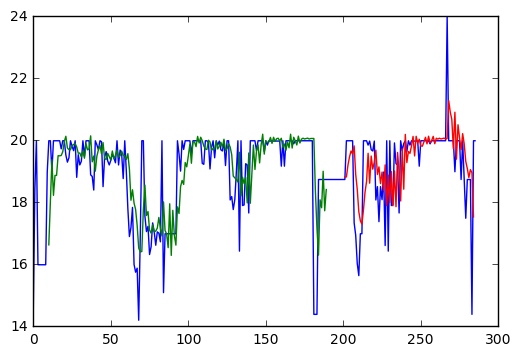

In [393]:
# generate predictions for training
trainPredict = model.predict(trainX, batch_size=10)
testPredict = model.predict(testX, batch_size=10)
testScore = mean_absolute_error(testY, testPredict)
print('Test Score: %.2f MAE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [384]:
# convert an array of values into a dataset matrix
def get_data(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        tmp1 = dataset[i:(i+look_back)] 
        dataX.append(tmp1)
        tmp2 = dataset[i + look_back] 
        dataY.append(tmp2)
    return numpy.array(dataX), numpy.array(dataY)


print len(testPredict), len(testX)
tmpArr = test
for i in xrange(10):
    tmpArr = np.append(tmpArr, testPredict[-1])
    #print type(tmpArr), tmpArr
    testX, testY = get_data(tmpArr, look_back)
    testPredict = model.predict(testX)


#print len(testPredict)

with open("train_predict.csv", 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(izip(testY, testPredict))

84 84


180